# Stats Smackdown: ML Predictions in MMA

Load Modules, Dataset, and Data Frame

In [2]:
import pandas as pan
import numpy as num
import matplotlib.pyplot as mp

from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

In [3]:
dfr = pan.read_csv('ufc-fighters-statistics.csv')

Inspect Data Frame

In [4]:
print(dfr.shape)
dfr.head(25)

(4111, 18)


,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
5,Gerald Strebendt,The Finishing Machine,9,7,0,175.26,70.31,NaN,Orthodox,1979-03-01,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4
6,Isaiah Hill,NaN,5,7,1,177.80,70.31,NaN,NaN,NaN,4.84,50.0,0.97,80.0,0.00,0.0,66.0,14.5
7,Kenneth Seegrist,NaN,4,7,0,182.88,83.91,NaN,Orthodox,NaN,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4
8,Will Kerr,NaN,9,3,0,177.80,70.31,175.26,Orthodox,1982-10-21,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3
9,Neil Grove,Goliath,12,8,1,198.12,120.20,NaN,Orthodox,1971-01-18,0.00,0.0,0.00,0.0,0.00,0.0,100.0,14.3


In [5]:
dfr.dtypes

name                                             object
nickname                                         object
wins                                              int64
losses                                            int64
draws                                             int64
height_cm                                       float64
weight_in_kg                                    float64
reach_in_cm                                     float64
stance                                           object
date_of_birth                                    object
significant_strikes_landed_per_minute           float64
significant_striking_accuracy                   float64
significant_strikes_absorbed_per_minute         float64
significant_strike_defence                      float64
average_takedowns_landed_per_15_minutes         float64
takedown_accuracy                               float64
takedown_defense                                float64
average_submissions_attempted_per_15_minutes    

Prepare Data and String Operations

In [6]:
dfr['name'].str.replace(' ', '_').str.lower()

0         robert_drysdale
1       daniel_mcwilliams
2              dan_molina
3               paul_ruiz
4         collin_huckbody
              ...        
4106      john_campetella
4107    andre_pederneiras
4108        bryson_kamaka
4109          matej_penaz
4110       pauline_macias
Name: name, Length: 4111, dtype: object

In [7]:
strings = list(dfr.dtypes[dfr.dtypes == 'object'].index)
strings

['name', 'nickname', 'stance', 'date_of_birth']

In [8]:
dfr.index

RangeIndex(start=0, stop=4111, step=1)

Delete Column

In [9]:
unwanted_column = 'nickname'

if unwanted_column in dfr.columns:
    # Drop the unwanted column
    dfr = dfr.drop(unwanted_column, axis=1)
    print(f"\n'{unwanted_column}' column is not in the data frame.")
else:
    print(f"\n'{unwanted_column}' column has been successfully dropped.")

# Print remaining column names
print("\nColumns after deletion:")
print(dfr.columns)


'nickname' column is not in the data frame.

Columns after deletion:
Index(['name', 'wins', 'losses', 'draws', 'height_cm', 'weight_in_kg',
       'reach_in_cm', 'stance', 'date_of_birth',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes'],
      dtype='object')


Discover Missing Values

In [10]:
dfr.isnull()

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
4107,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4108,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
4109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
dfr.isnull().sum()

name                                               0
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64

In [12]:
dfr_cleaned = dfr.dropna(subset=['height_cm', 'weight_in_kg', 'reach_in_cm', 'stance', 'date_of_birth'])

Summarize Findings

In [13]:
dfr.describe().round(2)

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.00,4111.00,4111.00,3813.00,4024.00,2184.00,4111.00,4111.00,4111.00,4111.00,4111.00,4111.0,4111.00,4111.00
mean,12.37,5.73,0.26,178.23,77.40,181.81,2.44,35.54,3.15,42.64,1.25,26.3,38.96,0.61
std,9.37,5.10,0.82,8.89,17.98,10.68,1.99,20.40,2.85,22.32,1.94,28.7,34.43,1.51
min,0.00,0.00,0.00,152.40,47.63,147.32,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,7.00,2.00,0.00,172.72,65.77,175.26,0.83,27.00,1.55,36.00,0.00,0.0,0.00,0.00
50%,11.00,5.00,0.00,177.80,77.11,182.88,2.33,40.00,2.94,50.00,0.59,22.0,42.00,0.00
75%,17.00,8.00,0.00,185.42,83.91,190.50,3.60,49.00,4.23,58.00,1.94,45.0,66.00,0.70
max,253.00,83.00,11.00,226.06,349.27,213.36,17.65,100.00,52.50,100.00,32.14,100.0,100.00,21.90


In [14]:
dfr.nunique()

name                                            4105
wins                                              57
losses                                            40
draws                                             12
height_cm                                         26
weight_in_kg                                     112
reach_in_cm                                       27
stance                                             5
date_of_birth                                   2565
significant_strikes_landed_per_minute            698
significant_striking_accuracy                     83
significant_strikes_absorbed_per_minute          813
significant_strike_defence                        84
average_takedowns_landed_per_15_minutes          560
takedown_accuracy                                 83
takedown_defense                                  94
average_submissions_attempted_per_15_minutes      99
dtype: int64

## Extensive EDA

Range of Values

In [15]:
numb_cols = dfr.select_dtypes(include=['int64', 'float64']).columns

col_ranges = dfr[numb_cols].agg(['min', 'max', 'mean', 'std']).transpose()

print("Numeric Column Ranges:")
print(col_ranges)

Numeric Column Ranges:
                                                 min     max        mean  \
wins                                            0.00  253.00   12.366821   
losses                                          0.00   83.00    5.726344   
draws                                           0.00   11.00    0.264413   
height_cm                                     152.40  226.06  178.234325   
weight_in_kg                                   47.63  349.27   77.395825   
reach_in_cm                                   147.32  213.36  181.808874   
significant_strikes_landed_per_minute           0.00   17.65    2.437516   
significant_striking_accuracy                   0.00  100.00   35.542447   
significant_strikes_absorbed_per_minute         0.00   52.50    3.145206   
significant_strike_defence                      0.00  100.00   42.643639   
average_takedowns_landed_per_15_minutes         0.00   32.14    1.250586   
takedown_accuracy                               0.00  100.00   26

* 'wins': The total number of victories in the fighter's career.
* 'losses': The total number of losses in the fighter's career.
* 'draws': The total number of draws or ties in the fighter's career.
* 'height_cm': The fighter's height in centimeters.
* 'weight_in_kg': The fighter's weight in kilograms.
* 'reach_in_cm': The fighter's reach, measured in centimeters.
* 'stance': The preferred fighting stance of the fighter (orthodox, southpaw, etc.).
* 'date_of_birth': The fighter's date of birth.
* 'significant_strikes_landed_per_minute': The average number of significant strikes landed by the fighter per minute.
* 'significant_striking_accuracy': The percentage of significant strikes that the fighter lands successfully.
* 'significant_strikes_absorbed_per_minute': The average number of significant strikes absorbed by the fighter per minute.
* 'significant_strike_defence': The percentage of significant strikes that the fighter successfully defends against.
* 'average_takedowns_landed_per_15_minutes': The average number of successful takedowns by the fighter per 15 minutes.
* 'takedown_accuracy': The percentage of takedown attempts by the fighter that are successful.
* 'takedown_defense': The percentage of takedown attempts against the fighter that are defended successfully.
* 'average_submissions_attempted_per_15_minutes': The average number of submission attempts by the fighter per 15 minutes.

Analysis of Target Variable

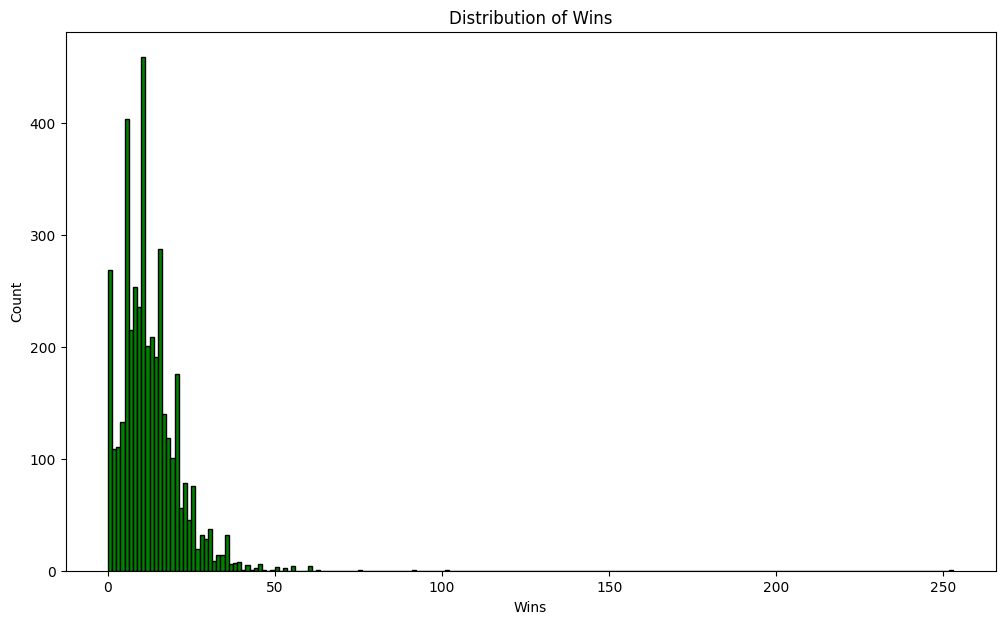

In [16]:
mp.figure(figsize=(12, 7))
mp.hist(dfr['wins'], bins='auto', color='green', edgecolor='black')
mp.title('Distribution of Wins')
mp.xlabel('Wins')
mp.ylabel('Count')
mp.show()

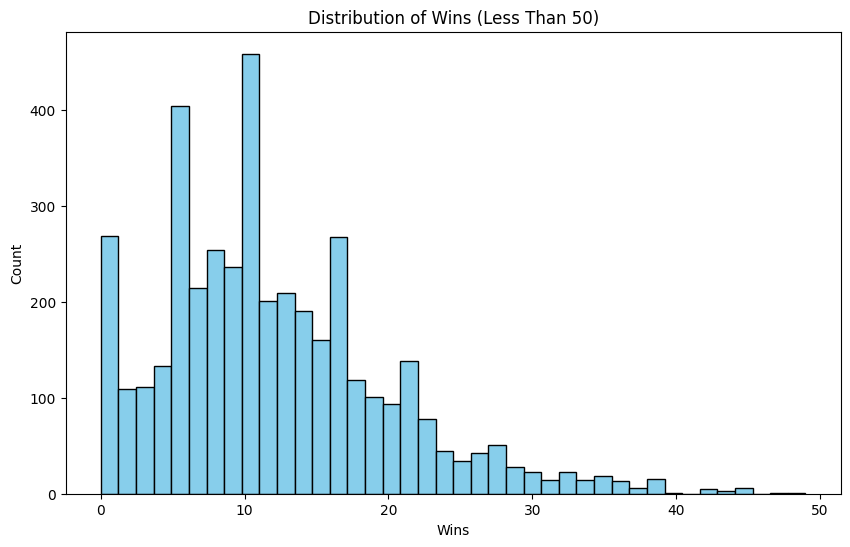

In [17]:
filtered_data = dfr[dfr['wins'] < 50]

mp.figure(figsize=(10, 6))
mp.hist(filtered_data['wins'], bins='auto', color='skyblue', edgecolor='black')
mp.title('Distribution of Wins (Less Than 50)')
mp.xlabel('Wins')
mp.ylabel('Count')
mp.show()

In [18]:
num.log1p([0, 1, 10, 20, 30])

array([0.        , 0.69314718, 2.39789527, 3.04452244, 3.4339872 ])

In [19]:
num.log([0 + 1, 1+ 1, 10 + 1, 20 + 1, 30])

array([0.        , 0.69314718, 2.39789527, 3.04452244, 3.40119738])

In [20]:
win_logs = num.log1p(dfr.wins)

(array([151.,   0.,   0., 118.,   0., 109.,   0., 111., 133., 174., 230.,
        469., 455., 441., 400., 547., 333., 199., 125.,  81.,  16.,  10.,
          5.,   1.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.18457781, 0.36915562, 0.55373343, 0.73831124,
        0.92288904, 1.10746685, 1.29204466, 1.47662247, 1.66120028,
        1.84577809, 2.0303559 , 2.21493371, 2.39951152, 2.58408932,
        2.76866713, 2.95324494, 3.13782275, 3.32240056, 3.50697837,
        3.69155618, 3.87613399, 4.0607118 , 4.2452896 , 4.42986741,
        4.61444522, 4.79902303, 4.98360084, 5.16817865, 5.35275646,
        5.53733427]),
 <BarContainer object of 30 artists>)

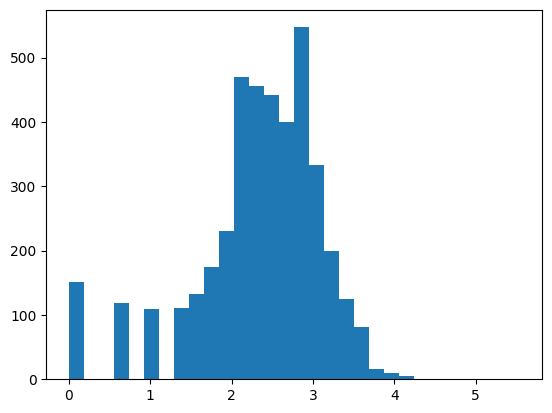

In [21]:
mp.hist(win_logs, bins=30)

Validation Framework & Train Test Split

In [22]:
full_train, test_df = train_test_split(dfr, test_size=0.1, random_state=2)
train_df, val_df = train_test_split(full_train, test_size=0.50, random_state=2)

In [23]:
len(train_df), len(val_df), len(test_df)

(1849, 1850, 412)

In [24]:
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [25]:
train_y = train_df.wins.values
val_y = val_df.wins.values
test_y = test_df.wins.values

Feature Importance: Correlation Coefficient

In [26]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

full_train.max()

name                                            Zviad Lazishvili
wins                                                         253
losses                                                        83
draws                                                         11
height_cm                                                 226.06
weight_in_kg                                              349.27
reach_in_cm                                               213.36
significant_strikes_landed_per_minute                      17.65
significant_striking_accuracy                              100.0
significant_strikes_absorbed_per_minute                     52.5
significant_strike_defence                                 100.0
average_takedowns_landed_per_15_minutes                    32.14
takedown_accuracy                                          100.0
takedown_defense                                           100.0
average_submissions_attempted_per_15_minutes                21.9
dtype: object

In [27]:
numerical = ['wins', 'losses', 'draws', 'height_cm', 'weight_in_kg', 'reach_in_cm', 'significant_strikes_landed_per_minute', 'significant_striking_accuracy', 'significant_strikes_absorbed_per_minute', 'significant_strike_defence', 'average_takedowns_landed_per_15_minutes', 'takedown_accuracy', 'takedown_defense', 'average_submissions_attempted_per_15_minutes']
full_train[numerical].corrwith(full_train.wins).abs()

wins                                            1.000000
losses                                          0.632433
draws                                           0.354744
height_cm                                       0.010295
weight_in_kg                                    0.027853
reach_in_cm                                     0.114643
significant_strikes_landed_per_minute           0.146679
significant_striking_accuracy                   0.227967
significant_strikes_absorbed_per_minute         0.025654
significant_strike_defence                      0.282151
average_takedowns_landed_per_15_minutes         0.065780
takedown_accuracy                               0.188148
takedown_defense                                0.235517
average_submissions_attempted_per_15_minutes    0.046781
dtype: float64

In [28]:
full_train[full_train.losses <= 2].wins.mean()

6.5331971399387125

In [29]:
full_train[(full_train.losses > 2) & (full_train.losses <= 12)].wins.mean()

13.001660440016604

In [30]:
full_train[full_train.losses > 12].wins.mean()

25.607717041800644

In [31]:
full_train[full_train.significant_strike_defence <= 20].wins.mean()

7.136701337295691

In [32]:
full_train[(full_train.significant_strike_defence > 20) & (full_train.significant_strike_defence <= 50)].wins.mean()

11.92258064516129

In [33]:
full_train[full_train.significant_strike_defence > 50].wins.mean()

14.61030235162374

Word Cloud

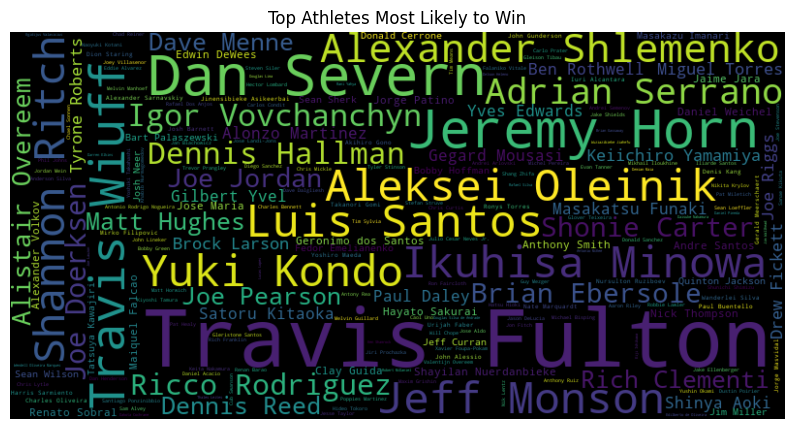

In [34]:
name_wins_dict = dict(zip(dfr['name'], dfr['wins']))

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(name_wins_dict)

mp.figure(figsize=(10, 6))
mp.imshow(wordcloud, interpolation='bilinear')
mp.axis('off')
mp.title('Top Athletes Most Likely to Win')
mp.show()

## Train Models

### Logistic Regression Model

In [35]:
import numpy as num
def sigmoid(z):
    return 1 / (1 + num.exp(-z))

z = num.linspace(-7, 7, 51)   

sigmoid(1000)

1.0

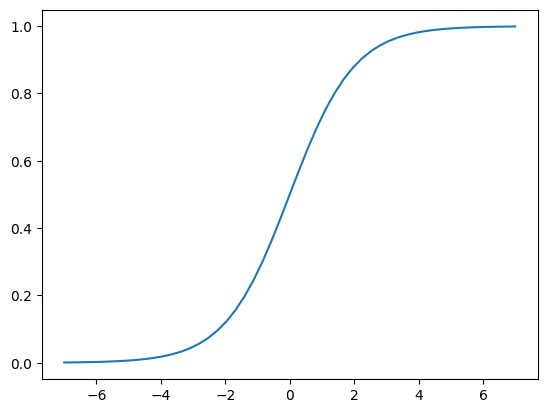

In [36]:
import matplotlib.pyplot as mp
mp.plot(z, sigmoid(z))

In [37]:
def log_reg(xi):
    score = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
X = dfr[['losses', 
        'draws', 
        'height_cm', 
        'weight_in_kg', 
        'reach_in_cm', 
        'significant_strikes_landed_per_minute', 
        'significant_striking_accuracy', 
        'significant_strikes_absorbed_per_minute',                     
        'significant_strike_defence',                                 
        'average_takedowns_landed_per_15_minutes',                    
        'takedown_accuracy',                                          
        'takedown_defense',                                           
        'average_submissions_attempted_per_15_minutes']]

y = dfr['wins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [40]:
import numpy as num

X_train = num.nan_to_num(X_train, nan=0)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression(random_state=42, max_iter=1000)  # You might need to adjust max_iter

log_reg_model.fit(X_train_scaled, y_train)

y_pred = log_reg_model.predict(X_test_scaled)

Logisitc Regression Parameters

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000],
}


log_reg_model = LogisticRegression(random_state=42, max_iter=1000, solver='saga')

# Create Standard Scaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
log_reg_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)


## Decision Tree Model

In [46]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=num.unique(y_train), y=y_train)

In [47]:
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier 

class_weights = compute_class_weight('balanced', classes=num.unique(y_train), y=y_train)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Decision Tree Parameters

In [51]:
best_params = grid_search.best_params_

final_model = DecisionTreeClassifier(random_state=42, **best_params)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)